In [1]:
from fastai import *
from fastai.vision import *

In [2]:
classes = ['Man','Woman']

In [3]:
folder = 'Man'
file = 'men.txt'

In [4]:
path = Path('data/Images')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
!cp ../input/* {path}/

In [6]:
download_images(path/file, dest, max_pics=200)

Error https://istd.sutd.edu.sg/files/people-istd-faculty-ngai-man-cheung.jpg HTTPSConnectionPool(host='istd.sutd.edu.sg', port=443): Max retries exceeded with url: /files/people-istd-faculty-ngai-man-cheung.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))


In [7]:
folder = 'Women'
file = 'women.txt'

In [8]:
path = Path('data/Images')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [9]:
download_images(path/file, dest, max_pics=200)

Error https://www.sss.gov/portals/0/Images/Women-and-the-Draft.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))


In [10]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Man


cannot identify image file <_io.BufferedReader name='data/Images/Man/00000095.jpg'>


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:971: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/Images/Man/00000054.jpg'>
cannot identify image file <_io.BufferedReader name='data/Images/Man/00000067.jpg'>


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/conda/lib/python3.6/site-packages/PIL/Image.py:971: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
Woman


/opt/conda/lib/python3.6/site-packages/fastprogress/fastprogress.py:102: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=64, num_workers=0).normalize(imagenet_stats)

In [12]:
data.classes

['Man', 'Women']

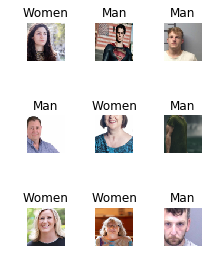

In [13]:
data.show_batch(rows=3, figsize=(3,4))

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 61085413.52it/s]


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.910499,0.958480,0.473684,00:08
1,0.801445,0.637378,0.368421,00:08
2,0.701026,0.337837,0.184211,00:07
3,0.623094,0.283017,0.157895,00:08


In [16]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


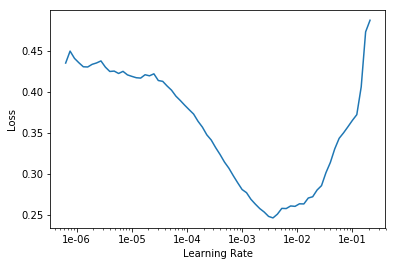

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.401718,0.216663,0.131579,00:09
1,0.403081,0.196401,0.131579,00:10


In [21]:
learn.save('stage-2')

In [22]:
learn.load('stage-2');

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

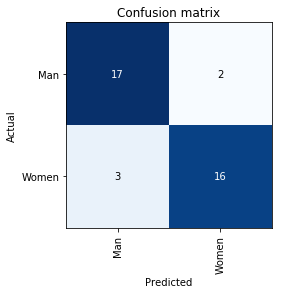

In [25]:
interp.plot_confusion_matrix()